# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 0. Requisiti necessari per questo playbook

è necessario avere python versione $\ge$ 3.8, inoltre sono necesarie le seguenti librerie:

- **pandas**
- **numpy**
- **yfinance**
- **matplotlib**
- **seaborn**
- **scipy**

possono essere installate con i seguenti comandi:
```
pip install pandas
pip install numpy
pip install yfinance
pip install matplotlib
pip install seaborn
pip install scipy
```

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (**FB**)
- Alphabet Inc. (**GOOG**)
- Raytheon Technologies Corporation (**RTX**)
- Lockheed Martin Corporation (**LMT**)
- Bank of America Corporation (**BAC**)
- JPMorgan Chase & Co. (**JPM**)

Importiamo ora i titoli direttamente da Yahoo Finance

In [1]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt # per il plot dei grafici
import seaborn as sns # heatmaps

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
tecno_df = yf.download('FB GOOG', start='2011-11-30', end='2021-11-30')
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
mil_df = yf.download('RTX LMT', start='2011-11-30', end='2021-11-30')
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
banc_df = yf.download('BAC JPM', start='2011-11-30', end='2021-11-30')
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

## tutti i titoli in un solo dataset
df_merged = yf.download('FB GOOG RTX LMT BAC JPM', start='2011-11-30', end='2021-11-30') # Download del dataset completo

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed


Effetuiamo ora la fusione dei dati in un solo DataFrame e visualiziamo i primi 10 dati in tabella

In [2]:
# Creazione del dataframe di pandas
adj_close_tot = pd.DataFrame()

# NOTA: Si lavora con Adj Close in quanto tengono conto di eventuali azioni effettuate dalla azienda, come 
# lo split degli asset.

# popolazione del dataframe con i dati presi da yahoo finance
adj_close_tot["Meta Price"] = fb_df[["Adj Close"]] # NOTA: quotata in borsa da 18-05-2012
adj_close_tot["Alphabet Price"] = goog_df[["Adj Close"]]
adj_close_tot["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_tot["Lockheed Martin Price"] = lmt_df[["Adj Close"]]
adj_close_tot["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_tot["JPMorgan Chase Price"] = jpm_df[["Adj Close"]]
adj_close_tot.dropna() # drop dei valori mancanti

adj_close_tot.head(10) # generazione tabella con i primi 10 valori

,Meta Price,Alphabet Price,Raytheon Price,Lockheed Martin Price,Bank of America Price,JPMorgan Chase Price
Date,,,,,,
2012-05-18,38.230000,299.078979,35.868057,60.931610,6.052373,25.427305
2012-05-21,34.029999,305.908386,36.522194,61.557247,5.888562,24.683229
2012-05-22,31.000000,299.278229,36.641117,61.601410,6.017885,25.822107
2012-05-23,32.000000,303.592072,36.700592,61.351170,6.181697,26.011921
2012-05-24,33.029999,300.702881,36.423073,61.365910,6.155833,25.791744
2012-05-25,31.910000,294.660553,36.185207,60.880085,6.164454,25.434893
2012-05-29,28.840000,296.060303,37.211014,61.579330,6.414481,25.533592
2012-05-30,28.190001,293.016693,36.542004,61.683655,6.215917,25.024899
2012-05-31,29.600000,289.345459,36.725361,61.683655,6.345415,25.169157


Visualiziamo i dati nel dataframe qui sopra in un graifo a linee, per visualizzare l'andamento del prezzo negli anni

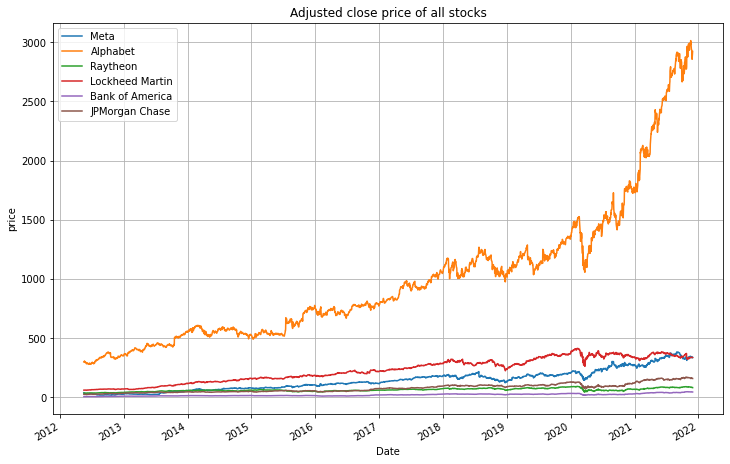

In [3]:
# plot del graifco, specificando i parametri necessari
adj_close_tot["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tot["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
adj_close_tot["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_tot["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
adj_close_tot["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_tot["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left") # per mostrare la legenda in alto a sx
plt.title("Adjusted close price of all stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

## 2. Statistiche descrittive

### 2.1 Rendimenti semplici e composti

#### Titoli tecnologici

Tabella dei rendimenti semplici Netti e Lordi

In [4]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

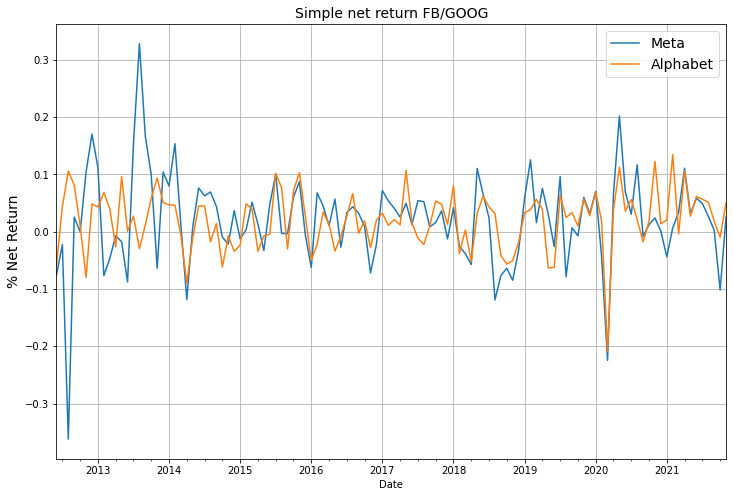

In [5]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return FB/GOOG", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [6]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Compositi Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Compositi Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Compositi Meta", "Rendimenti Compositi Alphabet"]]

,Rendimenti Compositi Meta,Rendimenti Compositi Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

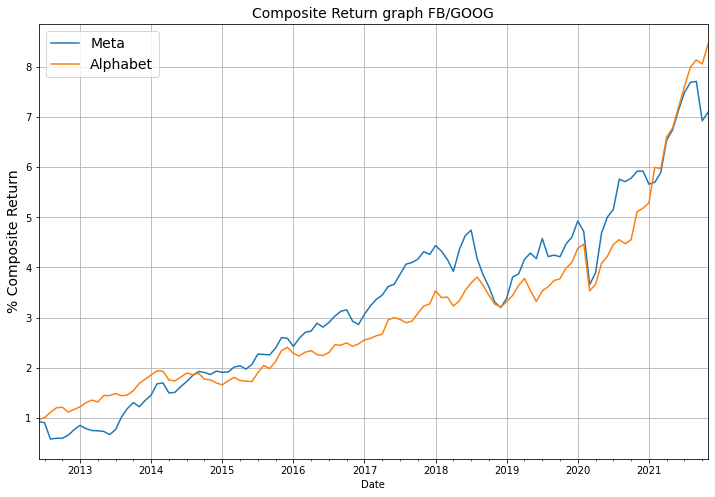

In [7]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli
rendimenti_tecno["Rendimenti Compositi Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Compositi Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph FB/GOOG", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli tecnologici

Confronto sulle serie storiche di FB e GOOG per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di GOOG e FB
2. Tabella con indice correlazione

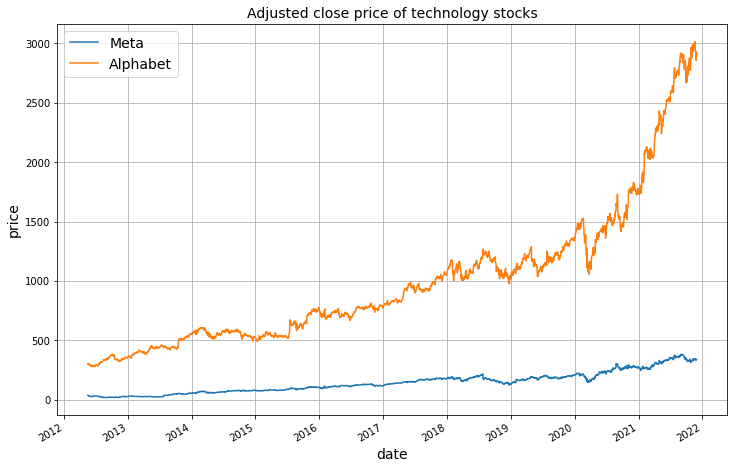

In [8]:
# Creiamo un nuovo dataframe per isolare il prezzo di GOOG e FB
adj_close_tecno = pd.DataFrame()

adj_close_tecno["Meta Price"] = fb_df[["Adj Close"]]
adj_close_tecno["Alphabet Price"] = goog_df[["Adj Close"]]

adj_close_tecno["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tecno["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
plt.title("Adjusted close price of technology stocks", fontsize=14) # titolo del grafico
plt.legend(loc="upper left", fontsize=14)
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.xlabel("date", fontsize=14)
plt.show()

In [9]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_tecno.corr()

,Meta Price,Alphabet Price
Meta Price,1.000000,0.962272
Alphabet Price,0.962272,1.000000


#### Titoli militari

Tabella dei rendimenti semplici Netti e Lordi per RTX e LMT

In [10]:
# Raggruppamento dei dati con media
rtx_group = rtx_df.groupby(pd.Grouper(freq='M')).mean()
lmt_group = lmt_df.groupby(pd.Grouper(freq='M')).mean()

rtx_month_returns = rtx_group[['Adj Close']]
lmt_month_returns = lmt_group[['Adj Close']]
rendimenti_mil = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Raytheon (RTX)
rendimenti_netti_rtx = np.log(rtx_month_returns/rtx_month_returns.shift(1))
rendimenti_lordi_rtx = np.log(rendimenti_netti_rtx + 1)

# Calcoli dei rendimenti netti e lordi per Lockheed Martin (LMT)
rendimenti_netti_lmt = np.log(lmt_month_returns/lmt_month_returns.shift(1))
rendimenti_lordi_lmt = np.log(rendimenti_netti_lmt + 1)

rendimenti_mil["Rendimenti Netti Raytheon"] = rendimenti_netti_rtx
rendimenti_mil["Rendimenti Lordi Raytheon"] = rendimenti_lordi_rtx
rendimenti_mil["Rendimenti Netti Lockheed Martin"] = rendimenti_netti_lmt
rendimenti_mil["Rendimenti Lordi Lockheed Martin"] = rendimenti_lordi_lmt
rendimenti_mil = rendimenti_mil.dropna()

rendimenti_mil

,Rendimenti Netti Raytheon,Rendimenti Lordi Raytheon,Rendimenti Netti Lockheed Martin,Rendimenti Lordi Lockheed Martin
Date,,,,
2011-12-31,-0.005292,-0.005306,0.016011,0.015884
2012-01-31,0.027827,0.027447,0.038575,0.037850
2012-02-29,0.082457,0.079234,0.066357,0.064249
2012-03-31,0.012832,0.012750,0.034661,0.034074
2012-04-30,-0.034980,-0.035606,0.010139,0.010088
...,...,...,...,...
2021-07-31,-0.022304,-0.022557,-0.016970,-0.017116
2021-08-31,0.007073,0.007048,-0.045274,-0.046331
2021-09-30,-0.015047,-0.015162,-0.030881,-0.031368


Grafico a Linee dei rendimenti semplici netti

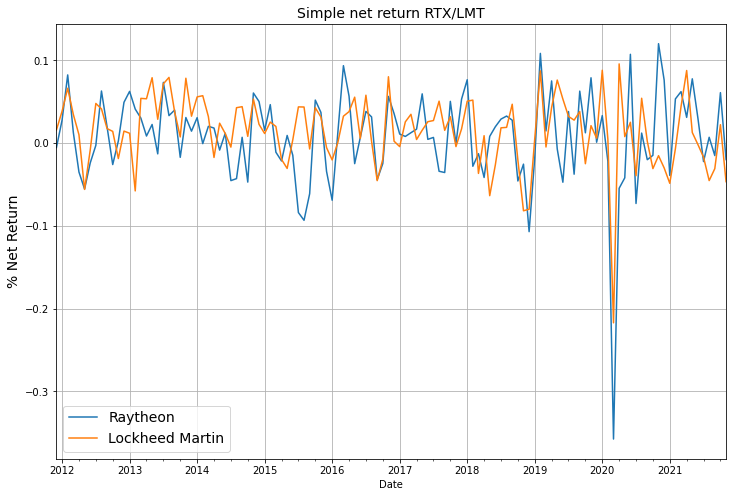

In [11]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_mil["Rendimenti Netti Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Netti Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="lower left", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return RTX/LMT", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [12]:
# Rendimenti composti per Raytheon (RTX)
cumul_daily_return_rtx = (1 + rendimenti_netti_rtx).cumprod()
rendimenti_mil["Rendimenti Compositi Raytheon"] = cumul_daily_return_rtx

# Rendimenti composti per Lockheed Martin (LMT)
cumul_daily_return_lmt = (1 + rendimenti_netti_lmt).cumprod()
rendimenti_mil["Rendimenti Compositi Lockheed Martin"] = cumul_daily_return_lmt

# Costruzione tabella con titoli colonne
rendimenti_mil[["Rendimenti Compositi Raytheon", "Rendimenti Compositi Lockheed Martin"]]

,Rendimenti Compositi Raytheon,Rendimenti Compositi Lockheed Martin
Date,,
2011-12-31,0.994708,1.016011
2012-01-31,1.022387,1.055204
2012-02-29,1.106691,1.125225
2012-03-31,1.120892,1.164226
2012-04-30,1.081683,1.176030
...,...,...
2021-07-31,1.868969,5.815329
2021-08-31,1.882188,5.552043
2021-09-30,1.853866,5.380589


Grafico dei rendimenti composti

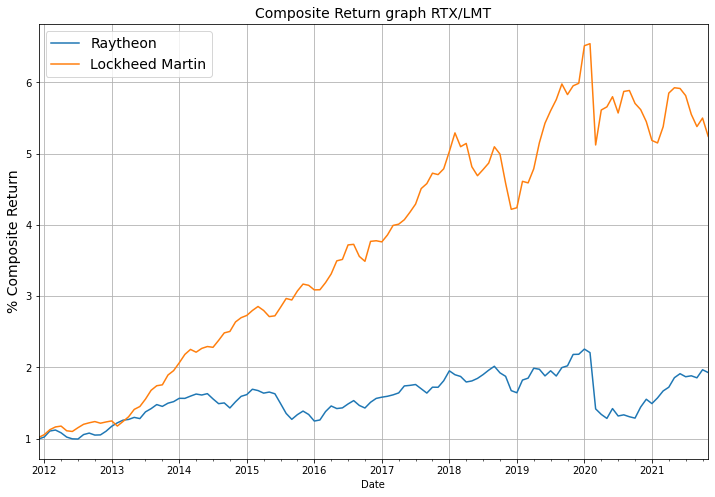

In [13]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli LMT/RTX
rendimenti_mil["Rendimenti Compositi Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Compositi Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph RTX/LMT", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli militari

Confronto sulle serie storiche di RTX e LMT per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di RTX e LMT
2. Tabella con indice correlazione

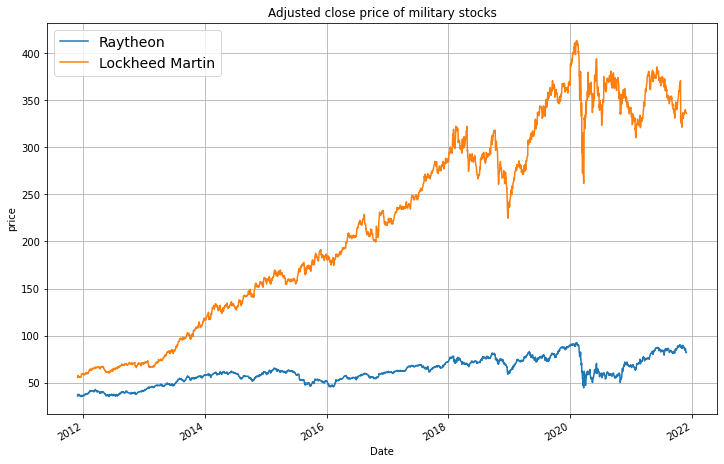

In [14]:
# Creiamo un nuovo dataframe per isolare il prezzo di RTX e LMT
adj_close_mil = pd.DataFrame()

adj_close_mil["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_mil["Lockheed Martin Price"] = lmt_df[["Adj Close"]]

adj_close_mil["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_mil["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of military stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

In [15]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_mil.corr()

,Raytheon Price,Lockheed Martin Price
Raytheon Price,1.000000,0.836831
Lockheed Martin Price,0.836831,1.000000


#### Titoli bancari

Tabella dei rendimenti semplici Netti e Lordi per BAC e JPM

In [16]:
# Raggruppamento dei dati con media
bac_group = bac_df.groupby(pd.Grouper(freq='M')).mean()
jpm_group = jpm_df.groupby(pd.Grouper(freq='M')).mean()

bac_month_returns = bac_group[['Adj Close']]
jpm_month_returns = jpm_group[['Adj Close']]
rendimenti_banc = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Bank of America (BAC)
rendimenti_netti_bac = np.log(bac_month_returns/bac_month_returns.shift(1))
rendimenti_lordi_bac = np.log(rendimenti_netti_bac + 1)

# Calcoli dei rendimenti netti e lordi per JPMorgan Chase (JPM)
rendimenti_netti_jpm = np.log(jpm_month_returns/jpm_month_returns.shift(1))
rendimenti_lordi_jpm = np.log(rendimenti_netti_jpm + 1)

rendimenti_banc["Rendimenti Netti Bank of America"] = rendimenti_netti_bac
rendimenti_banc["Rendimenti Lordi Bank of America"] = rendimenti_lordi_bac
rendimenti_banc["Rendimenti Netti JPMorgan Chase"] = rendimenti_netti_jpm
rendimenti_banc["Rendimenti Lordi JPMorgan Chase"] = rendimenti_lordi_jpm
rendimenti_banc = rendimenti_banc.dropna()

rendimenti_banc

,Rendimenti Netti Bank of America,Rendimenti Lordi Bank of America,Rendimenti Netti JPMorgan Chase,Rendimenti Lordi JPMorgan Chase
Date,,,,
2011-12-31,0.038182,0.037471,0.087203,0.083609
2012-01-31,0.214105,0.194007,0.122811,0.115835
2012-02-29,0.162144,0.150267,0.046805,0.045743
2012-03-31,0.121862,0.114989,0.126862,0.119437
2012-04-30,-0.026216,-0.026566,0.014923,0.014813
...,...,...,...,...
2021-07-31,-0.063906,-0.066039,-0.024773,-0.025085
2021-08-31,0.047449,0.046358,0.029489,0.029063
2021-09-30,0.011157,0.011095,0.013406,0.013317


Grafico a Linee dei rendimenti semplici netti

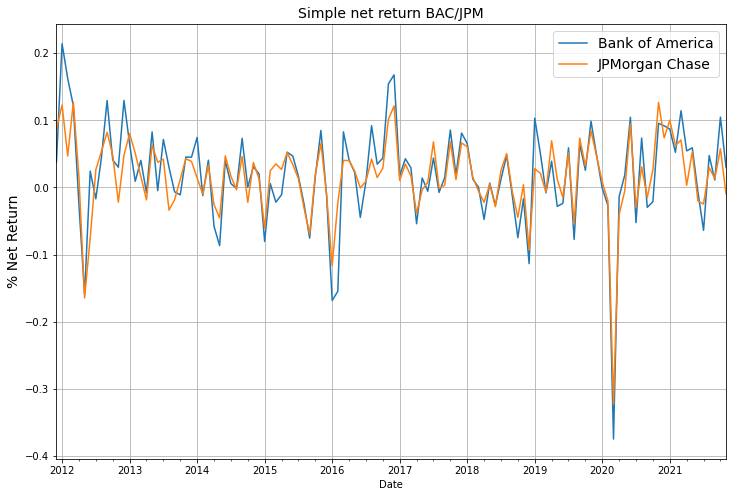

In [17]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_banc["Rendimenti Netti Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Netti JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return BAC/JPM", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [18]:
# Rendimenti composti per Bank of America (BAC)
cumul_daily_return_bac = (1 + rendimenti_netti_bac).cumprod()
rendimenti_banc["Rendimenti Compositi Bank of America"] = cumul_daily_return_bac

# Rendimenti composti per JPMorgan Chase (JPM)
cumul_daily_return_jpm = (1 + rendimenti_netti_jpm).cumprod()
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"] = cumul_daily_return_jpm

# Costruzione tabella con titoli colonne
rendimenti_banc[["Rendimenti Compositi Bank of America", "Rendimenti Compositi JPMorgan Chase"]]

,Rendimenti Compositi Bank of America,Rendimenti Compositi JPMorgan Chase
Date,,
2011-12-31,1.038182,1.087203
2012-01-31,1.260462,1.220723
2012-02-29,1.464838,1.277859
2012-03-31,1.643346,1.439971
2012-04-30,1.600264,1.461460
...,...,...
2021-07-31,5.974825,5.404686
2021-08-31,6.258325,5.564067
2021-09-30,6.328149,5.638657


Grafico dei rendimenti composti

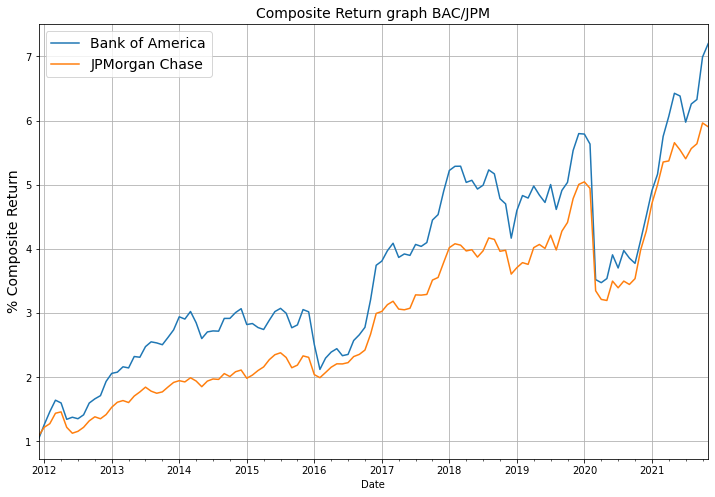

In [19]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli BAC/JPM
rendimenti_banc["Rendimenti Compositi Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph BAC/JPM", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli bancari

Confronto sulle serie storiche di BAC e JPM per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di BAC e JPM
2. Tabella con indice correlazione

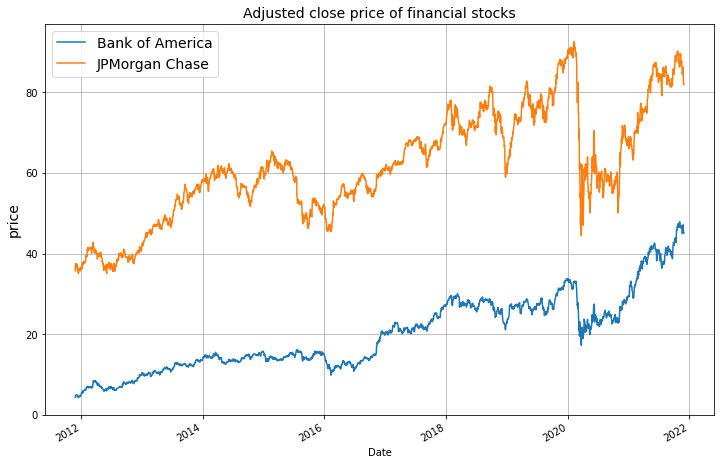

In [20]:
# Creiamo un nuovo dataframe per isolare il prezzo di BAC e JPM
adj_close_banc = pd.DataFrame()

adj_close_banc["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_banc["JPMorgan Chase Price"] = rtx_df[["Adj Close"]]

adj_close_banc["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_banc["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of financial stocks", fontsize=14) # titolo del grafico
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.show()

In [21]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_banc.corr()

,Bank of America Price,JPMorgan Chase Price
Bank of America Price,1.000000,0.909522
JPMorgan Chase Price,0.909522,1.000000


### 2.2 Istogramma dei rendimenti e dispersione

#### settore tecnologico (FB e GOOG)

Istogramma per ritorno netto

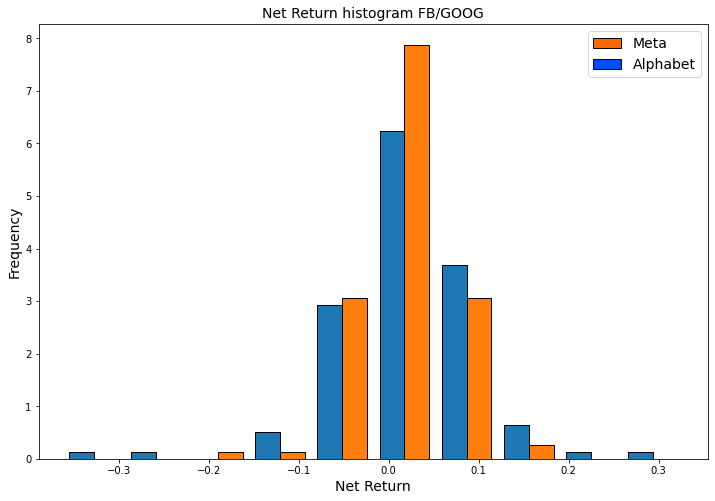

In [22]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib
from matplotlib.patches import Rectangle # per la legenda ci serve rectangle

cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]], density=True, edgecolor='black')
plt.title("Net Return histogram FB/GOOG", fontsize=14)
t_labels=["Meta", "Alphabet"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper right', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (FB e GOOG)

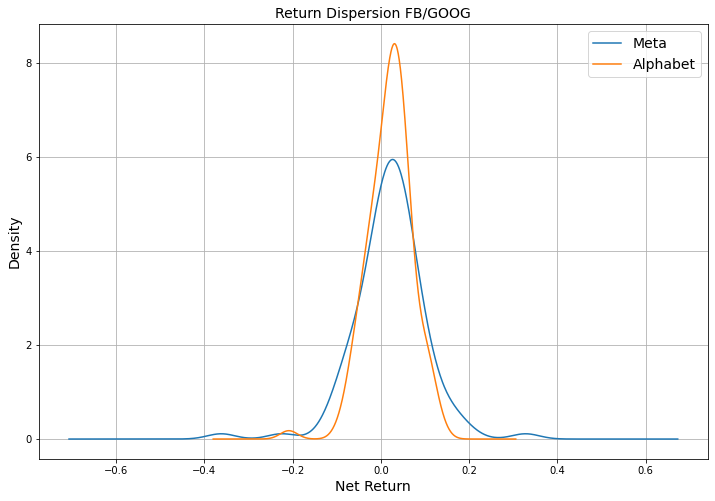

Deviazione Standard


Rendimenti Netti Meta        0.080678
Rendimenti Netti Alphabet    0.050795
dtype: float64

In [23]:
# Plot della dispersione dei rendimenti
rendimenti_tecno["Rendimenti Netti Meta"].plot.density(label="Meta", grid=True, figsize=(12,8),)
rendimenti_tecno["Rendimenti Netti Alphabet"].plot.density(label="Alphabet", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return Dispersion FB/GOOG", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]].std()

#### settore militare (RTX e LMT)

Istogramma per ritorno netto su RTX e LMT

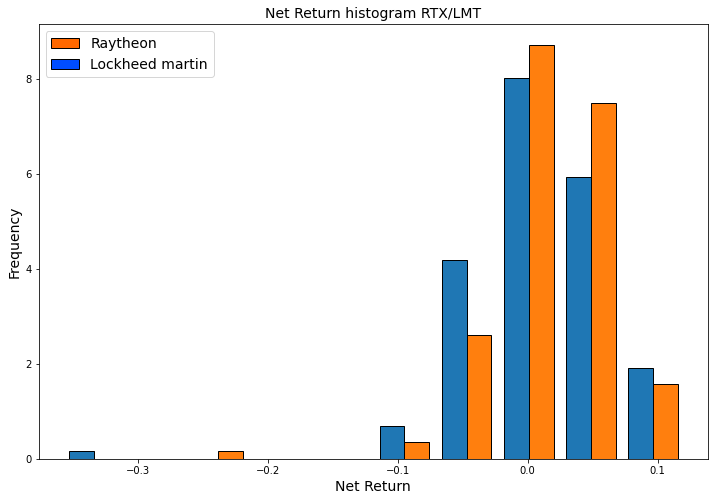

In [24]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib per RTX e LMT
cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_mil[["Rendimenti Netti Raytheon", "Rendimenti Netti Lockheed Martin"]], density=True, edgecolor='black')
plt.title("Net Return histogram RTX/LMT", fontsize=14)
t_labels=["Raytheon", "Lockheed martin"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper left', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (RTX e LMT)

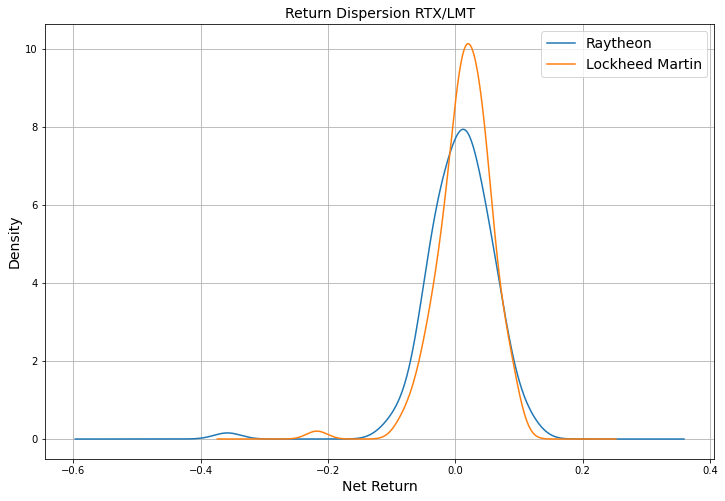

Deviazione Standard


Rendimenti Netti Raytheon           0.055370
Rendimenti Netti Lockheed Martin    0.042682
dtype: float64

In [25]:
# Plot della dispersione dei rendimenti per titoli militari
rendimenti_mil["Rendimenti Netti Raytheon"].plot.density(label="Raytheon", grid=True, figsize=(12,8),)
rendimenti_mil["Rendimenti Netti Lockheed Martin"].plot.density(label="Lockheed Martin", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return Dispersion RTX/LMT", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_mil[["Rendimenti Netti Raytheon", "Rendimenti Netti Lockheed Martin"]].std()

#### settore militare (RTX e LMT)

Istogramma per ritorno netto su BAC e JPM

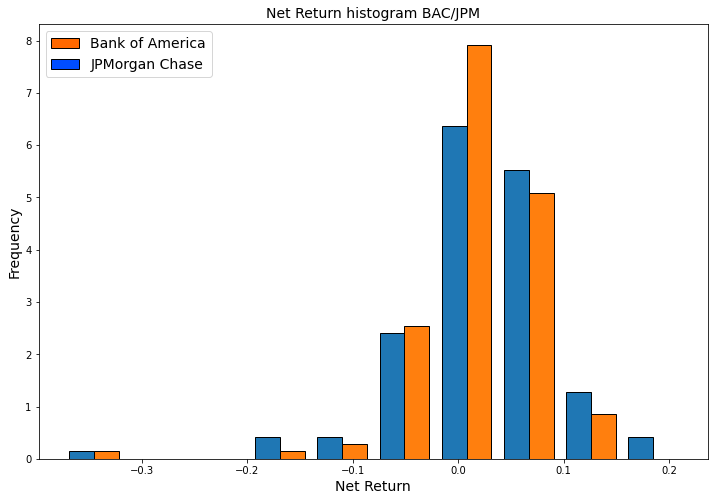

In [26]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib per BAC e JPM
cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_banc[["Rendimenti Netti Bank of America", "Rendimenti Netti JPMorgan Chase"]], density=True, edgecolor='black')
plt.title("Net Return histogram BAC/JPM", fontsize=14)
t_labels=["Bank of America", "JPMorgan Chase"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper left', fontsize=14) # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

#### Dispersione rendimenti (BAC e JPM)

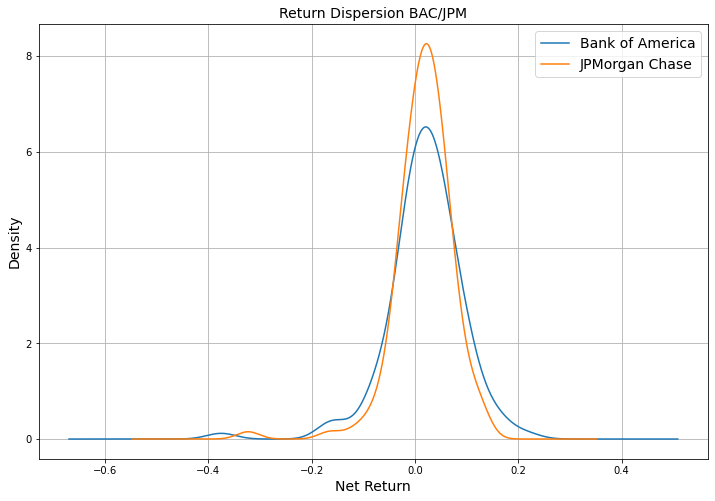

Deviazione Standard


Rendimenti Netti Bank of America    0.072910
Rendimenti Netti JPMorgan Chase     0.056944
dtype: float64

In [27]:
# Plot della dispersione dei rendimenti per titoli militari
rendimenti_banc["Rendimenti Netti Bank of America"].plot.density(label="Bank of America", grid=True, figsize=(12,8),)
rendimenti_banc["Rendimenti Netti JPMorgan Chase"].plot.density(label="JPMorgan Chase", grid=True, figsize=(12,8),)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Net Return", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Return Dispersion BAC/JPM", fontsize=14)


plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_banc[["Rendimenti Netti Bank of America", "Rendimenti Netti JPMorgan Chase"]].std()

### 2.3 Grafici Diagnostici a 4 sezioni

I grafici richiesti per questa sezione per ogni titolo considerato sono:
- istogramma
- kernel density
- boxplot
- qq-plot

Iniziamo con **Meta (FB)**

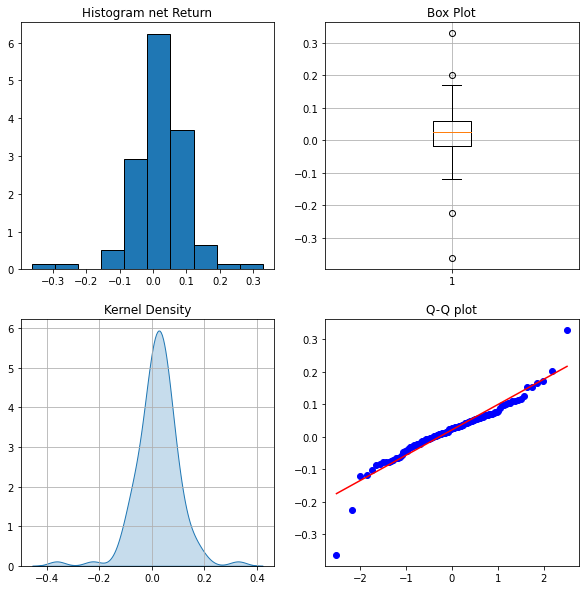

In [28]:
# Effettuiamo per la prima volta il plot di 3 grafici nella stessa immagine
from scipy import stats # importiamo stats dalla libreria scipy

rendimenti_netti_fb = rendimenti_netti_fb.dropna() # drop delle righe vuote (meta quotata solo da 2012)

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_fb["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_fb["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_fb["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_fb["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Ora per **Alphabet (GOOG)**

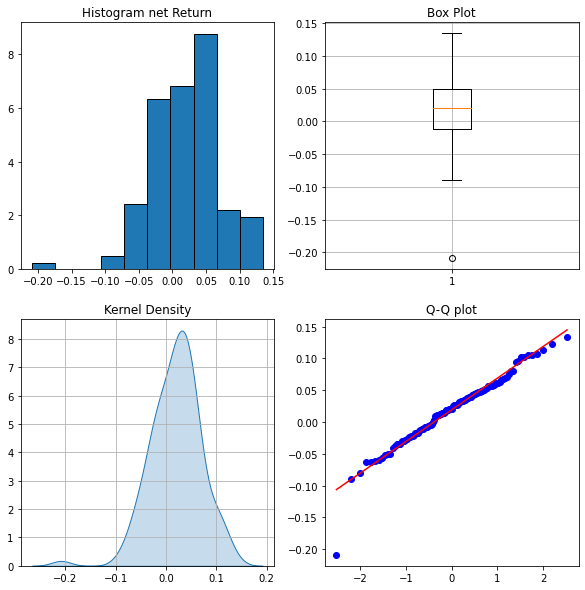

In [29]:
# Plot dei grafici diagnostici per Alphabet
rendimenti_netti_goog = rendimenti_netti_goog.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_goog["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_goog["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_goog["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_goog["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Raytheon (RTX)**

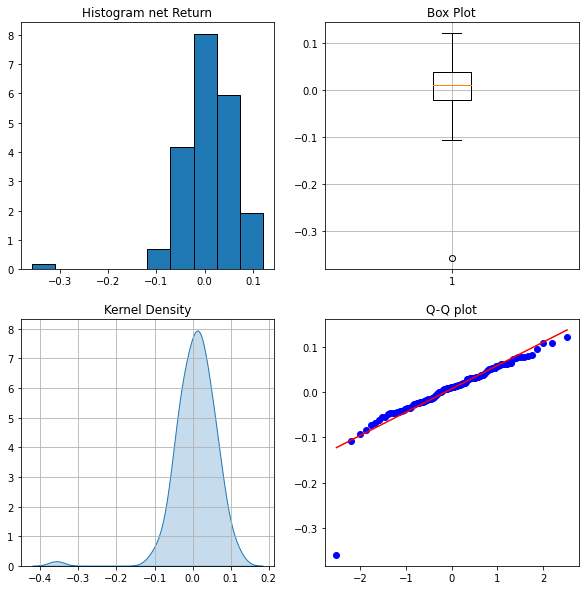

In [30]:
# Plot dei grafici diagnostici per Raytheon
rendimenti_netti_rtx = rendimenti_netti_rtx.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_rtx["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_rtx["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_rtx["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_rtx["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Lockheed Martin (LMT)**

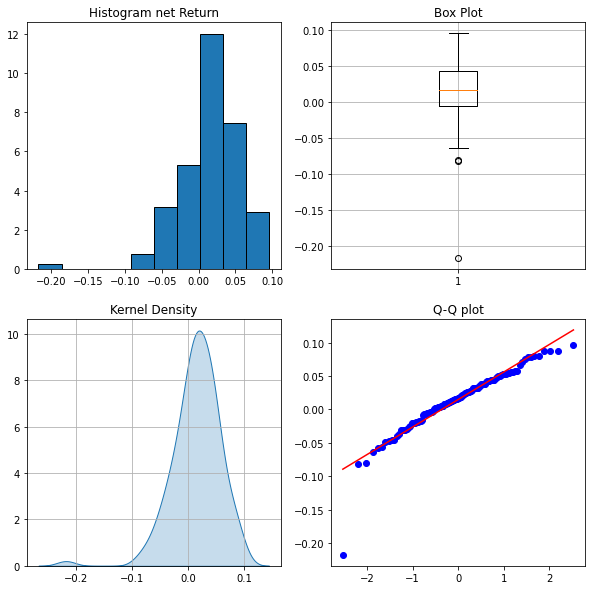

In [31]:
# Plot dei grafici diagnostici per Lockheed Martin
rendimenti_netti_lmt = rendimenti_netti_lmt.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_lmt["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_lmt["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_lmt["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_lmt["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **Bank of America (BAC)**

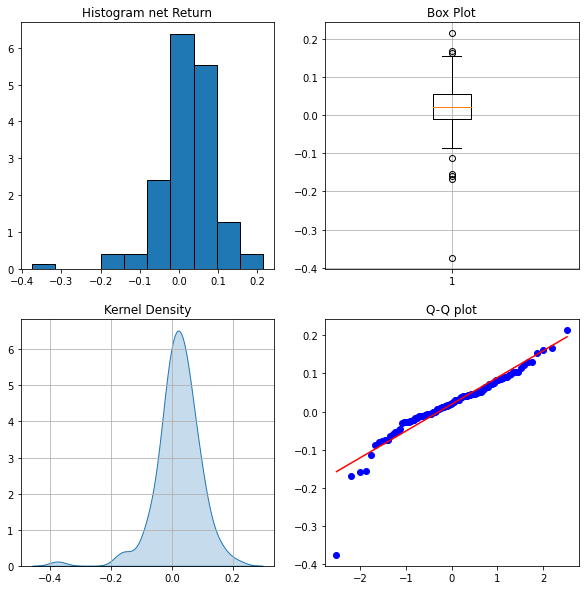

In [32]:
# Plot dei grafici diagnostici per Bank of America
rendimenti_netti_bac = rendimenti_netti_bac.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_bac["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_bac["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_bac["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_bac["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Per **JPMorgan Chase (JPM)**

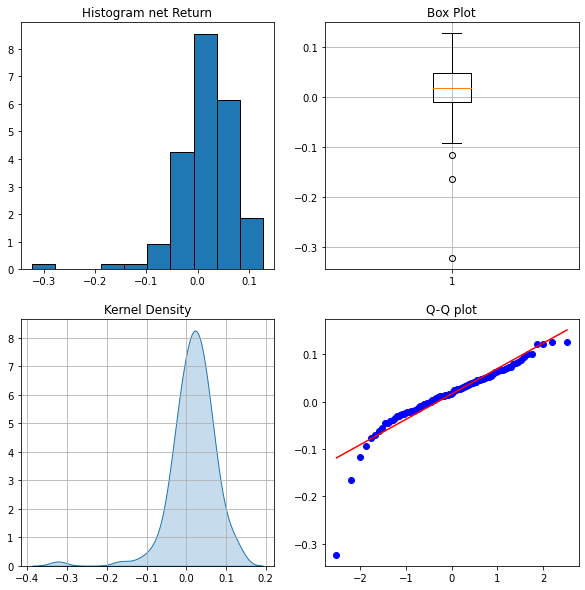

In [33]:
# Plot dei grafici diagnostici per JPMorgan Chase
rendimenti_netti_jpm = rendimenti_netti_jpm.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_jpm["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_jpm["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_jpm["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_jpm["Adj Close"],dist='norm',plot=plt)
plt.title("Q-Q plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

### 2.4 Statistiche descrittive univariate

Calcolo delle seguenti statistiche per ogni titolo:
- **Media**
- **Varianza**
- **Deviazione Standard**
- **Asimmetria**
- **Curtosi**

Inoltre determinare la evoluzione nel tempo per ogni titolo e la sua volatilità

#### Calcolo statistiche per Meta (FB)

In [34]:
# Calcolo di tutte le statistiche richieste per Meta (FB)
statistiche_fb = pd.DataFrame() # Creriamo un nuovo dataframe

# Assegnamo ad ogni elem del dataset la sua statistica di riferimento 
# (usiamo pandas per effettuare i calcoli statistici)
statistiche_fb["Media"] = round(rendimenti_netti_fb.mean(), 4)
statistiche_fb["Varianza"] = round(rendimenti_netti_fb.var(), 4)
statistiche_fb["Deviazione Standard"] = round(rendimenti_netti_fb.std(), 4)
statistiche_fb["Asimmetria"] = round(rendimenti_netti_fb.skew(), 4)
statistiche_fb["Curtosi"] = round(rendimenti_netti_fb.kurtosis(), 4)

print("Statistiche per Meta (FB)")
statistiche_fb # Print della tabella

Statistiche per Meta (FB)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0207,0.0065,0.0807,-0.5917,5.5871


Evoluzione nel tempo e volatilità per Meta


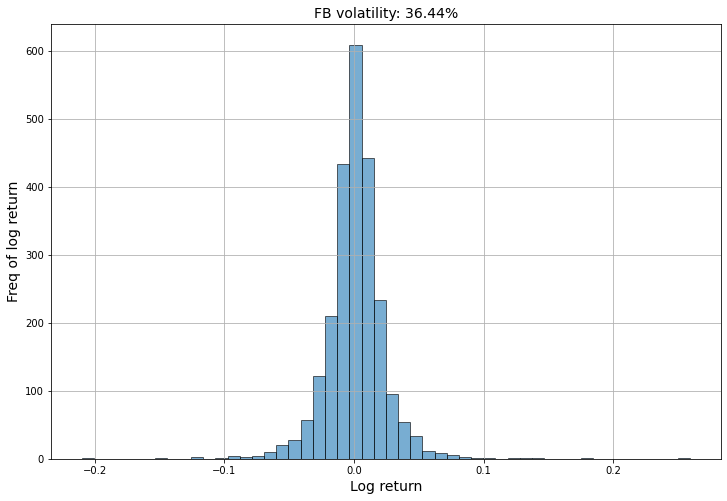

In [35]:
# Calcolo della volatilità per Meta (FB)
fb_daily_returns = fb_df[['Adj Close']]
rendimenti_netti_fb = np.log(fb_daily_returns['Adj Close']/fb_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_fb.std()*252**.5
str_vol = str(round(volatility, 4)*100)

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_fb.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("FB volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Meta")
plt.show()

#### Calcolo statistiche per Alphabet (GOOG)

In [36]:
# Calcolo di tutte le statistiche richieste per Alphabet (GOOG)
statistiche_goog = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_goog["Media"] = round(rendimenti_netti_goog.mean(), 4)
statistiche_goog["Varianza"] = round(rendimenti_netti_goog.var(), 4)
statistiche_goog["Deviazione Standard"] = round(rendimenti_netti_goog.std(), 4)
statistiche_goog["Asimmetria"] = round(rendimenti_netti_goog.skew(), 4)
statistiche_goog["Curtosi"] = round(rendimenti_netti_goog.kurtosis(), 4)

print("Statistiche per Alphabet (GOOG)")
statistiche_goog # Print della tabella

Statistiche per Alphabet (GOOG)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0192,0.0025,0.0501,-0.6988,2.6747


Evoluzione nel tempo e volatilità per Alphabet


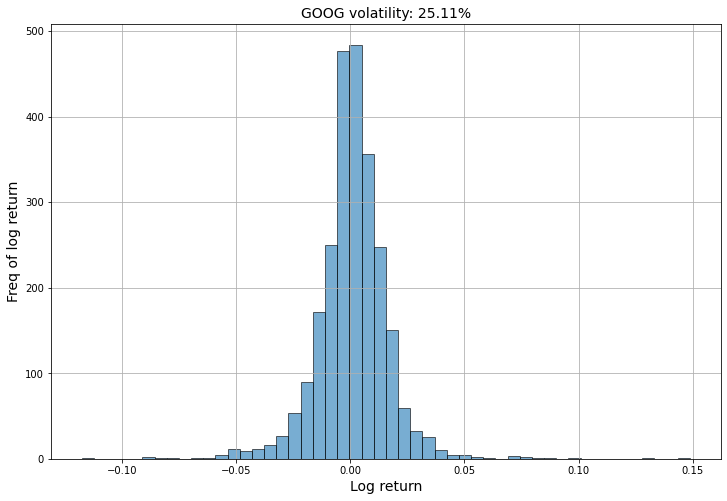

In [37]:
# Calcolo della volatilità per Alphabet (GOOG)
goog_daily_returns = goog_df[['Adj Close']]
rendimenti_netti_goog = np.log(goog_daily_returns['Adj Close']/goog_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_goog.std()*252**.5
str_vol = str(round(volatility, 4)*100)

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_goog.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("GOOG volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Alphabet")
plt.show()

#### Calcolo statistiche per Raytheon (RTX)

In [38]:
# Calcolo di tutte le statistiche richieste per Raytheon (RTX)
statistiche_rtx = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_rtx["Media"] = round(rendimenti_netti_rtx.mean(), 4)
statistiche_rtx["Varianza"] = round(rendimenti_netti_rtx.var(), 4)
statistiche_rtx["Deviazione Standard"] = round(rendimenti_netti_rtx.std(), 4)
statistiche_rtx["Asimmetria"] = round(rendimenti_netti_rtx.skew(), 4)
statistiche_rtx["Curtosi"] = round(rendimenti_netti_rtx.kurtosis(), 4)

print("Statistiche per Raytheon (RTX)")
statistiche_rtx # Print della tabella

Statistiche per Raytheon (RTX)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0072,0.0031,0.0554,-2.3533,14.7837


Evoluzione nel tempo e volatilità per Raytheon


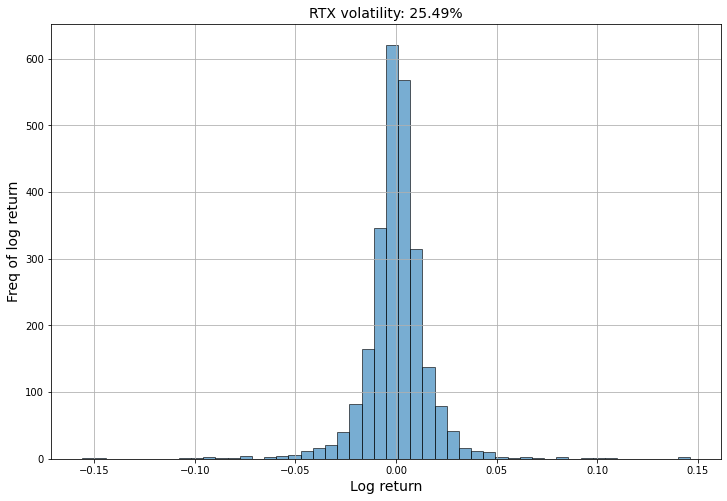

In [39]:
# Calcolo della volatilità per Raytheon (RTX)
rtx_daily_returns = rtx_df[['Adj Close']]
rendimenti_netti_rtx = np.log(rtx_daily_returns['Adj Close']/rtx_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_rtx.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_rtx.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("RTX volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Raytheon")
plt.show()

#### Calcolo statistiche per Lockheed Martin (LMT)

In [40]:
# Calcolo di tutte le statistiche richieste per Lockheed Martin (LMT)
statistiche_lmt = pd.DataFrame() # Creiamo un nuovo dataframe

statistiche_lmt["Media"] = round(rendimenti_netti_lmt.mean(), 4)
statistiche_lmt["Varianza"] = round(rendimenti_netti_lmt.var(), 4)
statistiche_lmt["Deviazione Standard"] = round(rendimenti_netti_lmt.std(), 4)
statistiche_lmt["Asimmetria"] = round(rendimenti_netti_lmt.skew(), 4)
statistiche_lmt["Curtosi"] = round(rendimenti_netti_lmt.kurtosis(), 4)

print("Statistiche per Lockheed Martin (LMT)")
statistiche_lmt # Print della tabella

Statistiche per Lockheed Martin (LMT)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0148,0.0018,0.0427,-1.4478,6.3315


Evoluzione nel tempo e volatilità per Lockheed Martin


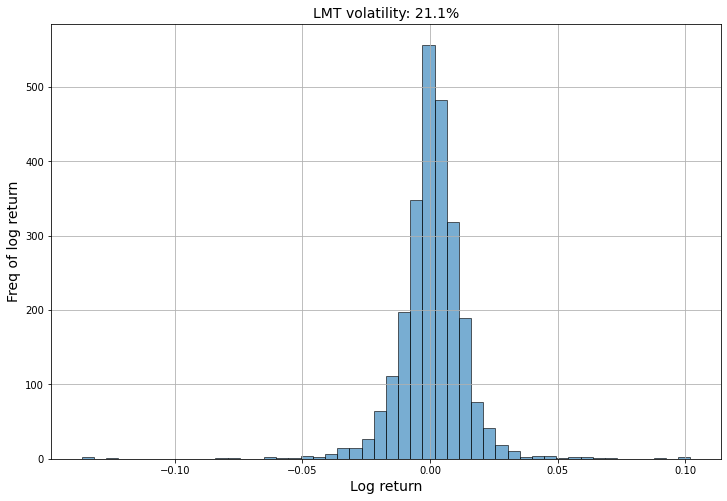

In [41]:
# Calcolo della volatilità per Lockheed Martin (LMT)
lmt_daily_returns = lmt_df[['Adj Close']]
rendimenti_netti_lmt = np.log(lmt_daily_returns['Adj Close']/lmt_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_lmt.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_lmt.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("LMT volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Lockheed Martin")
plt.show()

#### Calcolo statistiche per Bank of America (BAC)

In [42]:
# Calcolo di tutte le statistiche richieste per Bank of America (BAC)
statistiche_bac = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_bac["Media"] = round(rendimenti_netti_bac.mean(), 4)
statistiche_bac["Varianza"] = round(rendimenti_netti_bac.var(), 4)
statistiche_bac["Deviazione Standard"] = round(rendimenti_netti_bac.std(), 4)
statistiche_bac["Asimmetria"] = round(rendimenti_netti_bac.skew(), 4)
statistiche_bac["Curtosi"] = round(rendimenti_netti_bac.kurtosis(), 4)

print("Statistiche per Bank of America (BAC)")
statistiche_bac # Print della tabella

Statistiche per Bank of America (BAC)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0194,0.0053,0.0729,-1.3789,6.9176


Evoluzione nel tempo e volatilità per Bank of America


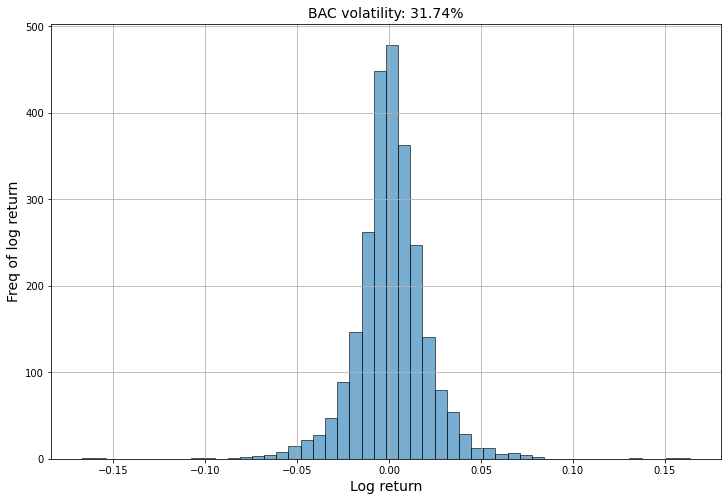

In [43]:
# Calcolo della volatilità per Bank of America (BAC)
bac_daily_returns = bac_df[['Adj Close']]
rendimenti_netti_bac = np.log(bac_daily_returns['Adj Close']/bac_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_bac.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_bac.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("BAC volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per Bank of America")
plt.show()

#### Calcolo statistiche per JPMorgan Chase (JPM)

In [44]:
# Calcolo di tutte le statistiche richieste per JPMorgan Chase (JPM)
statistiche_jpm = pd.DataFrame() # Creriamo un nuovo dataframe

statistiche_jpm["Media"] = round(rendimenti_netti_jpm.mean(), 4)
statistiche_jpm["Varianza"] = round(rendimenti_netti_jpm.var(), 4)
statistiche_jpm["Deviazione Standard"] = round(rendimenti_netti_jpm.std(), 4)
statistiche_jpm["Asimmetria"] = round(rendimenti_netti_jpm.skew(), 4)
statistiche_jpm["Curtosi"] = round(rendimenti_netti_jpm.kurtosis(), 4)

print("Statistiche per JPMorgan Chase (JPM)")
statistiche_jpm # Print della tabella

Statistiche per JPMorgan Chase (JPM)


,Media,Varianza,Deviazione Standard,Asimmetria,Curtosi
Adj Close,0.0166,0.0032,0.0569,-1.9897,10.3171


Evoluzione nel tempo e volatilità per JPMorgan Chase


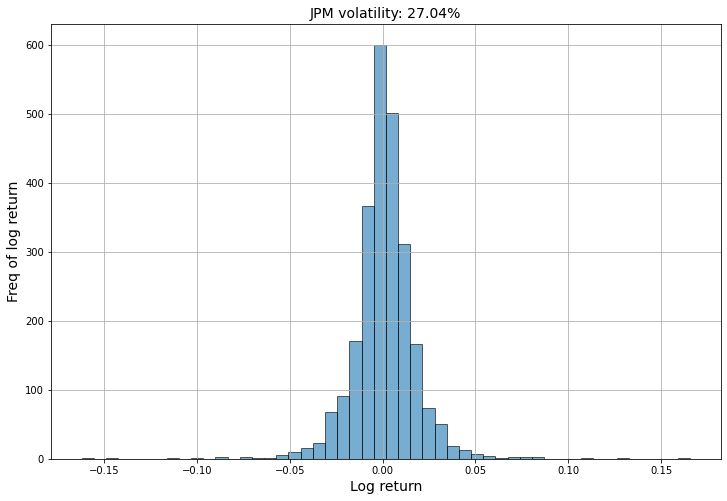

In [45]:
# Calcolo della volatilità per JPMorgan Chase (JPM)
jpm_daily_returns = jpm_df[['Adj Close']]
rendimenti_netti_jpm = np.log(jpm_daily_returns['Adj Close']/jpm_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_jpm.std()*252**.5
str_vol = str(round(volatility*100, 2))

plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
rendimenti_netti_jpm.hist(bins=50, alpha=0.6, edgecolor='black')

plt.xlabel("Log return", fontsize=14)
plt.ylabel("Freq of log return", fontsize=14)
plt.title("JPM volatility: " + str_vol + "%", fontsize=14)

print("Evoluzione nel tempo e volatilità per JPMorgan Chase")
plt.show()

### 2.5 Matrice di varianze/covarianze dei rendimenti

Per relazionare i diversi titoli e trovare il più rischioso

In [46]:
# Matrice di Varianze/Covarianze di tutti i titoli
returns = 100 * df_merged['Adj Close'].pct_change().dropna()

returns.cov() # Caloliamo la covariazna

,BAC,FB,GOOG,JPM,LMT,RTX
BAC,3.822654,1.275831,1.315323,2.887410,1.123326,1.861807
FB,1.275831,5.347862,1.843259,1.093737,0.780299,0.956871
GOOG,1.315323,1.843259,2.536485,1.147189,0.775151,1.099412
JPM,2.887410,1.093737,1.147189,2.790343,1.057371,1.725901
LMT,1.123326,0.780299,0.775151,1.057371,1.799856,1.207929
RTX,1.861807,0.956871,1.099412,1.725901,1.207929,2.616263


### 2.6 Matrice di correlazione dei rendimenti

In [47]:
# Matrice di correlazione sui rendimenti
# utilizziamo la matrice creata al blocco precedente e invochiamo la funzione di pandas corr
returns.corr()

,BAC,FB,GOOG,JPM,LMT,RTX
BAC,1.000000,0.282176,0.422410,0.884091,0.428257,0.588724
FB,0.282176,1.000000,0.500472,0.283135,0.251508,0.255813
GOOG,0.422410,0.500472,1.000000,0.431211,0.362786,0.426780
JPM,0.884091,0.283135,0.431211,1.000000,0.471824,0.638773
LMT,0.428257,0.251508,0.362786,0.471824,1.000000,0.556649
RTX,0.588724,0.255813,0.426780,0.638773,0.556649,1.000000


### 2.7 Grafico dell'anadamento nel tempo delle correlazioni tra i titoli e scatter plots

#### Per i titoli tecnologici (FB/GOOG)

In [48]:
# Lavoriamo solo con i titoli tecnologici
tecno_df_monthly = tecno_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_tecno_df = tecno_df['Adj Close']
tecno_returns = l_tecno_df.pct_change().dropna()

tecno_df_monthly = tecno_df_monthly['Adj Close']
tecno_returns_monthly = tecno_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli tecnologici")

tecno_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli tecnologici


,FB,GOOG
Date,,
2020-01-31,0.072747,0.071436
2020-02-29,-0.042180,0.019112
2020-03-31,-0.201236,-0.188317
2020-04-30,0.067908,0.038494
2020-05-31,0.223418,0.119090
2020-06-30,0.071565,0.036155
2020-07-31,0.030879,0.057668
2020-08-31,0.123631,0.021388
2020-09-30,-0.008311,-0.017718


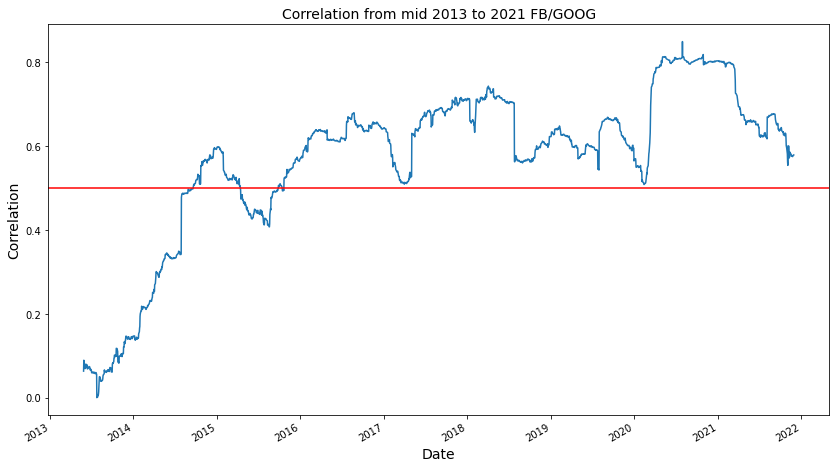

In [49]:
# Plot della correlazione nel tempo
cor = tecno_returns['FB'].rolling(255).corr(tecno_returns['GOOG']).plot(figsize=(14, 8))
cor.axhline(tecno_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from mid 2013 to 2021 FB/GOOG", fontsize=14)

plt.show()

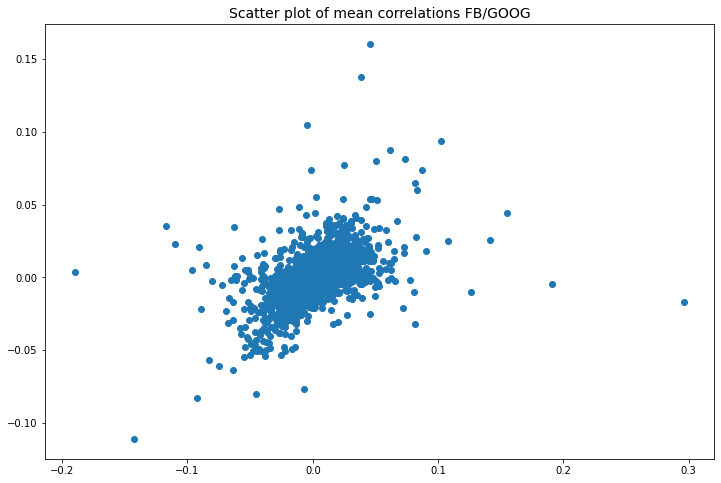

In [50]:
# Scatter plot (dispersione) delle correlazioni medie su titoli tecnologici
plt.figure(figsize=(12,8))
plt.scatter(tecno_returns['FB'],tecno_returns['GOOG'])
plt.title("Scatter plot of mean correlations FB/GOOG", fontsize=14)

plt.show()

#### Per i titoli militari (RTX/LMT)

In [51]:
# Lavoriamo solo con i titoli militari
mil_df_monthly = mil_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_mil_df = mil_df['Adj Close']
mil_returns = l_mil_df.pct_change().dropna()

mil_df_monthly = mil_df_monthly['Adj Close']
mil_returns_monthly = mil_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2017")

mil_returns_monthly.loc['2017-01-01':'2018-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2017


,LMT,RTX
Date,,
2017-01-31,-0.004217,0.011036
2017-02-28,0.026029,0.008094
2017-03-31,0.035454,0.012663
2017-04-30,0.004365,0.017049
2017-05-31,0.015709,0.061372
2017-06-30,0.026246,0.004578
2017-07-31,0.027679,0.006915
2017-08-31,0.052032,-0.033448
2017-09-30,0.015584,-0.034925


In [52]:
# Stampa dei ritorni log nel 2020
print("Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2020")

mil_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli militari nel 2020


,LMT,RTX
Date,,
2020-01-31,0.092100,0.033832
2020-02-29,0.004386,-0.021824
2020-03-31,-0.195262,-0.300745
2020-04-30,0.100500,-0.053140
2020-05-31,0.007897,-0.041125
2020-06-30,0.025524,0.113340
2020-07-31,-0.038608,-0.070383
2020-08-31,0.055741,0.012215
2020-09-30,0.002273,-0.019823


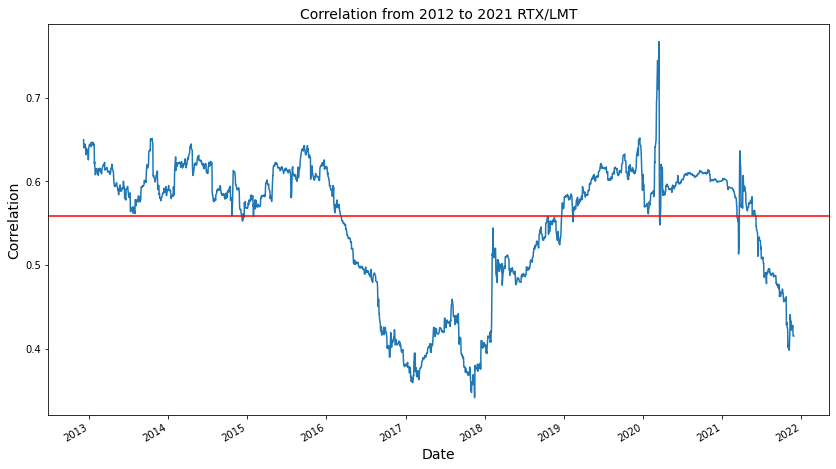

In [53]:
# Plot della correlazione nel tempo
cor = mil_returns['RTX'].rolling(255).corr(mil_returns['LMT']).plot(figsize=(14, 8))
cor.axhline(mil_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from 2012 to 2021 RTX/LMT", fontsize=14)

plt.show()

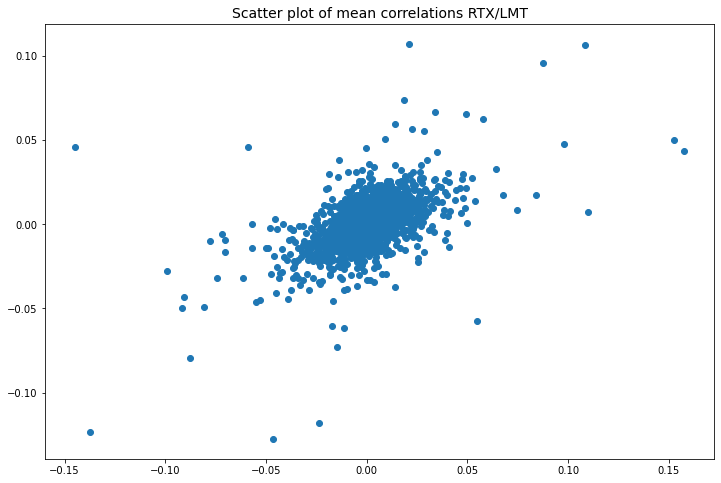

In [54]:
# Scatter plot (dispersione) delle correlazioni medie su titoli militari
plt.figure(figsize=(12,8))
plt.scatter(mil_returns['RTX'],mil_returns['LMT'])
plt.title("Scatter plot of mean correlations RTX/LMT", fontsize=14)

plt.show()

#### Per i titoli bancari (BAC/JPM)

In [55]:
# Lavoriamo solo con i titoli bancari
banc_df_monthly = banc_df.groupby(pd.Grouper(freq='M')).mean() # Otteniamo i dati mensili

l_banc_df = banc_df['Adj Close']
banc_returns = l_banc_df.pct_change().dropna()

banc_df_monthly = banc_df_monthly['Adj Close']
banc_returns_monthly = banc_df_monthly.pct_change().dropna()

print("Ritorni logaritmici mensili (ultimo anno) per i titoli bancari")

banc_returns_monthly.loc['2020-01-01':'2021-01-01']

Ritorni logaritmici mensili (ultimo anno) per i titoli bancari


,BAC,JPM
Date,,
2020-01-31,-0.001261,0.008060
2020-02-29,-0.026479,-0.019927
2020-03-31,-0.312586,-0.275772
2020-04-30,-0.013475,-0.039523
2020-05-31,0.018518,-0.005196
2020-06-30,0.110186,0.099117
2020-07-31,-0.051169,-0.029457
2020-08-31,0.076336,0.031229
2020-09-30,-0.029254,-0.014791


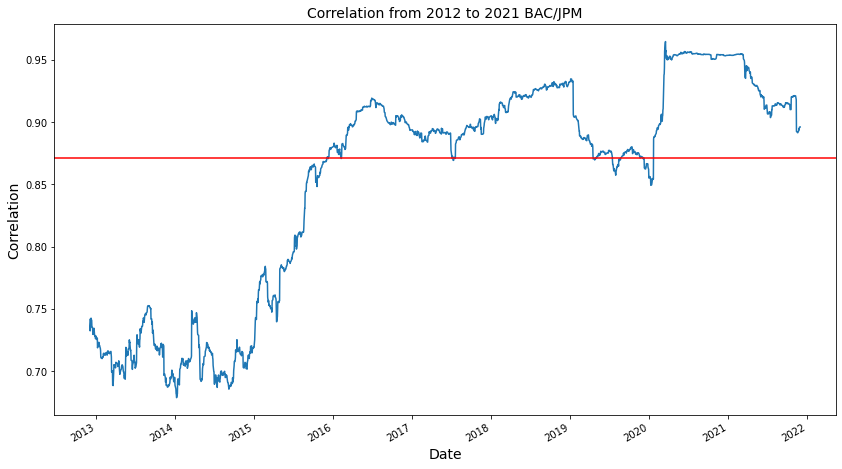

In [56]:
# Plot della correlazione nel tempo
cor = banc_returns['BAC'].rolling(255).corr(banc_returns['JPM']).plot(figsize=(14, 8))
cor.axhline(banc_returns.corr().iloc[0,1], c='r')
plt.ylabel("Correlation", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Correlation from 2012 to 2021 BAC/JPM", fontsize=14)

plt.show()

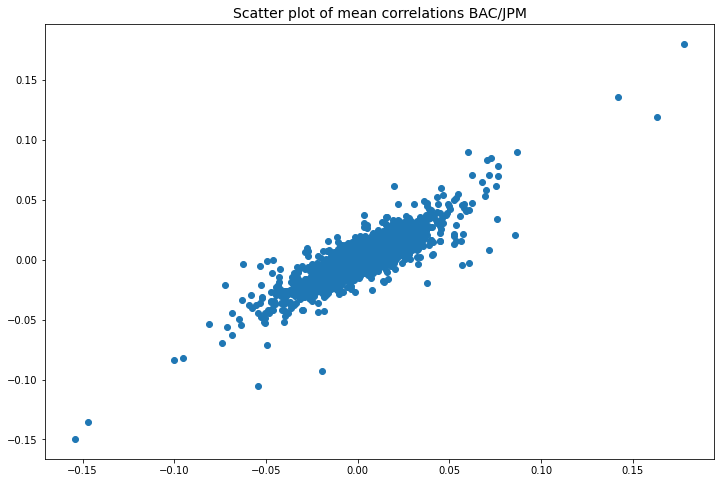

In [57]:
# Scatter plot (dispersione) delle correlazioni medie su titoli bancari
plt.figure(figsize=(12,8))
plt.scatter(banc_returns['BAC'],banc_returns['JPM'])
plt.title("Scatter plot of mean correlations BAC/JPM", fontsize=14)

plt.show()

## 3. Analisi di previsione

Per la analisi di previsione è stato utilizzato il modello statistico **ARIMA**